In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Key_Economic_Indicators.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Month,Year,Consumer Confidence Index TX,Consumer Confidence West South Central,Consumer Confidence Index US,PCE Deflator,Consumer Price Index TX,Consumer Price Index U.S.,CPI U.S. Ex Food and Energy,Nonfarm Employment TX,...,Retail Diesel Price TX,Nonfarm Employment Illinois,Nonfarm Employment Florida,Nonfarm Employment New York,Nonfarm Employment Texas,Nonfarm Employment California,Gross Value Crude Oil Production,Gross Value Natural Gas Production,Motor Fuel Taxed Gasoline,Motor Fuel Taxed Diesel
0,1,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.906,5829.6,7650.2,8490.6,9642.4,14881.8,NaN,NaN,NaN,NaN
1,2,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.958,5836.2,7670.7,8487.9,9653.2,14908.3,NaN,NaN,NaN,NaN
2,3,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.148,5833.8,7668.7,8483.6,9670.8,14929.3,NaN,NaN,NaN,NaN
3,4,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.226,5857.5,7716.4,8518.6,9715.1,14979.4,NaN,NaN,NaN,NaN
4,5,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.150,5855.4,7753.0,8509.9,9727.1,14985.4,NaN,NaN,NaN,NaN


In [2]:
df.isnull().sum()

Month                                       0
Year                                        0
Consumer Confidence Index TX              102
Consumer Confidence West South Central     37
Consumer Confidence Index US               37
PCE Deflator                              139
Consumer Price Index TX                    38
Consumer Price Index U.S.                  38
CPI U.S. Ex Food and Energy               139
Nonfarm Employment TX                      38
Nonfarm Employment U.S.                    38
Unemployment TX                            38
Unemployment U.S.                          38
Single Family Building Permits TX          38
Multi Family Building Permits TX           38
Existing Single Family Home Sales TX       38
Existing Single Family Home Price TX       38
Non Residential Building Construction      38
Total Sales Tax Collections Retail TX      33
Total Sales Tax Collections TX             33
Retail Gasoline Price TX                   14
Retail Diesel Price TX            

In [3]:
df.fillna(df.mean(), inplace=True)

# Create a 'Date' column from 'Year' and 'Month'
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Drop 'Year' and 'Month' columns as they are now redundant
df.drop(['Year', 'Month'], axis=1, inplace=True)

# Display the first few rows after preprocessing
df.head()

,Consumer Confidence Index TX,Consumer Confidence West South Central,Consumer Confidence Index US,PCE Deflator,Consumer Price Index TX,Consumer Price Index U.S.,CPI U.S. Ex Food and Energy,Nonfarm Employment TX,Nonfarm Employment U.S.,Unemployment TX,...,Nonfarm Employment Illinois,Nonfarm Employment Florida,Nonfarm Employment New York,Nonfarm Employment Texas,Nonfarm Employment California,Gross Value Crude Oil Production,Gross Value Natural Gas Production,Motor Fuel Taxed Gasoline,Motor Fuel Taxed Diesel,Date
0,118.689507,103.5364,91.639688,104.185381,224.367832,246.535318,227.06323,11.876692,142.422168,5.420093,...,5829.6,7650.2,8490.6,9642.4,14881.8,5765.683886,3199.81581,1093.784112,364.19486,2005-01-01
1,118.689507,103.5364,91.639688,104.185381,224.367832,246.535318,227.06323,11.876692,142.422168,5.420093,...,5836.2,7670.7,8487.9,9653.2,14908.3,5765.683886,3199.81581,1093.784112,364.19486,2005-02-01
2,118.689507,103.5364,91.639688,104.185381,224.367832,246.535318,227.06323,11.876692,142.422168,5.420093,...,5833.8,7668.7,8483.6,9670.8,14929.3,5765.683886,3199.81581,1093.784112,364.19486,2005-03-01
3,118.689507,103.5364,91.639688,104.185381,224.367832,246.535318,227.06323,11.876692,142.422168,5.420093,...,5857.5,7716.4,8518.6,9715.1,14979.4,5765.683886,3199.81581,1093.784112,364.19486,2005-04-01
4,118.689507,103.5364,91.639688,104.185381,224.367832,246.535318,227.06323,11.876692,142.422168,5.420093,...,5855.4,7753.0,8509.9,9727.1,14985.4,5765.683886,3199.81581,1093.784112,364.19486,2005-05-01


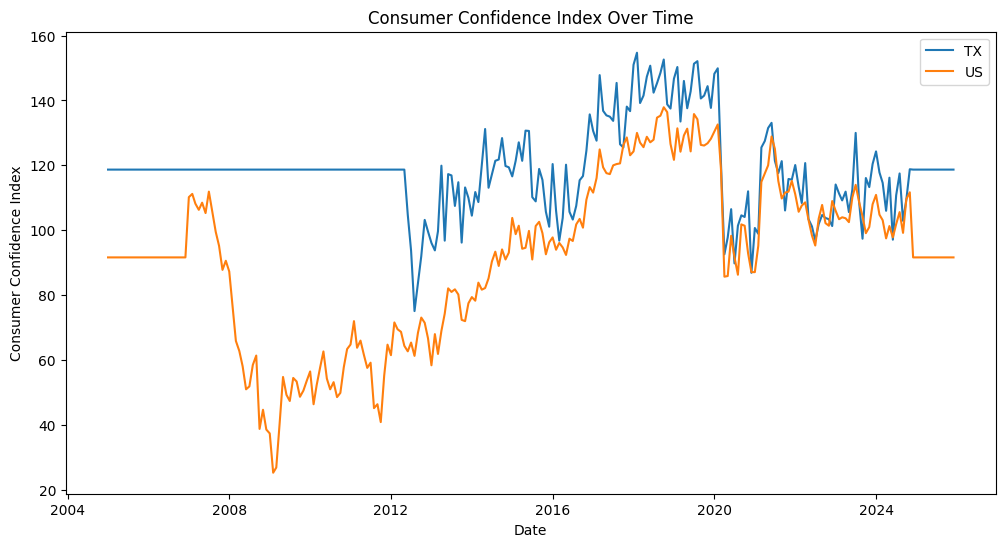

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Consumer Confidence Index TX', label='TX')
sns.lineplot(data=df, x='Date', y='Consumer Confidence Index US', label='US')
plt.title('Consumer Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Consumer Confidence Index')
plt.legend()
plt.show()

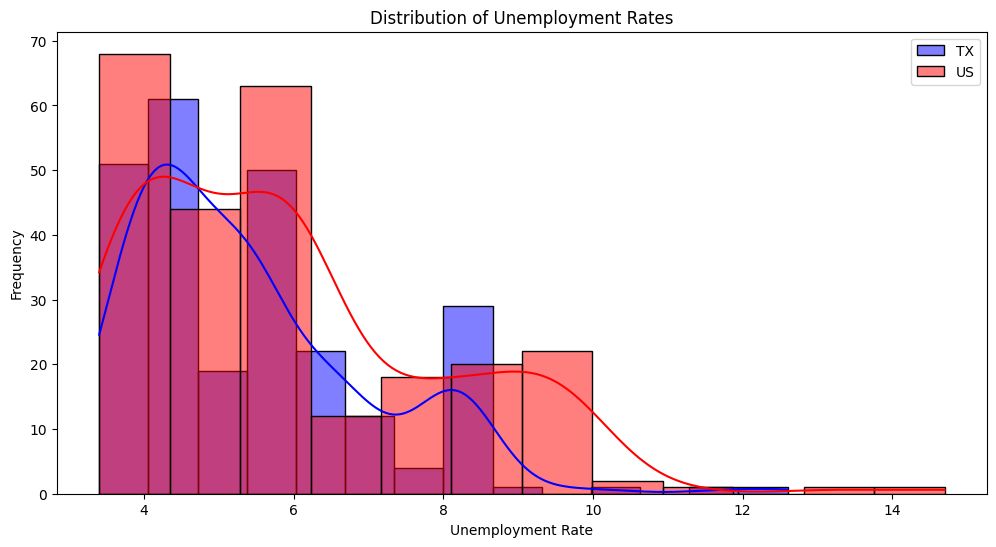

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Unemployment TX'], kde=True, color='blue', label='TX')
sns.histplot(df['Unemployment U.S.'], kde=True, color='red', label='US')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

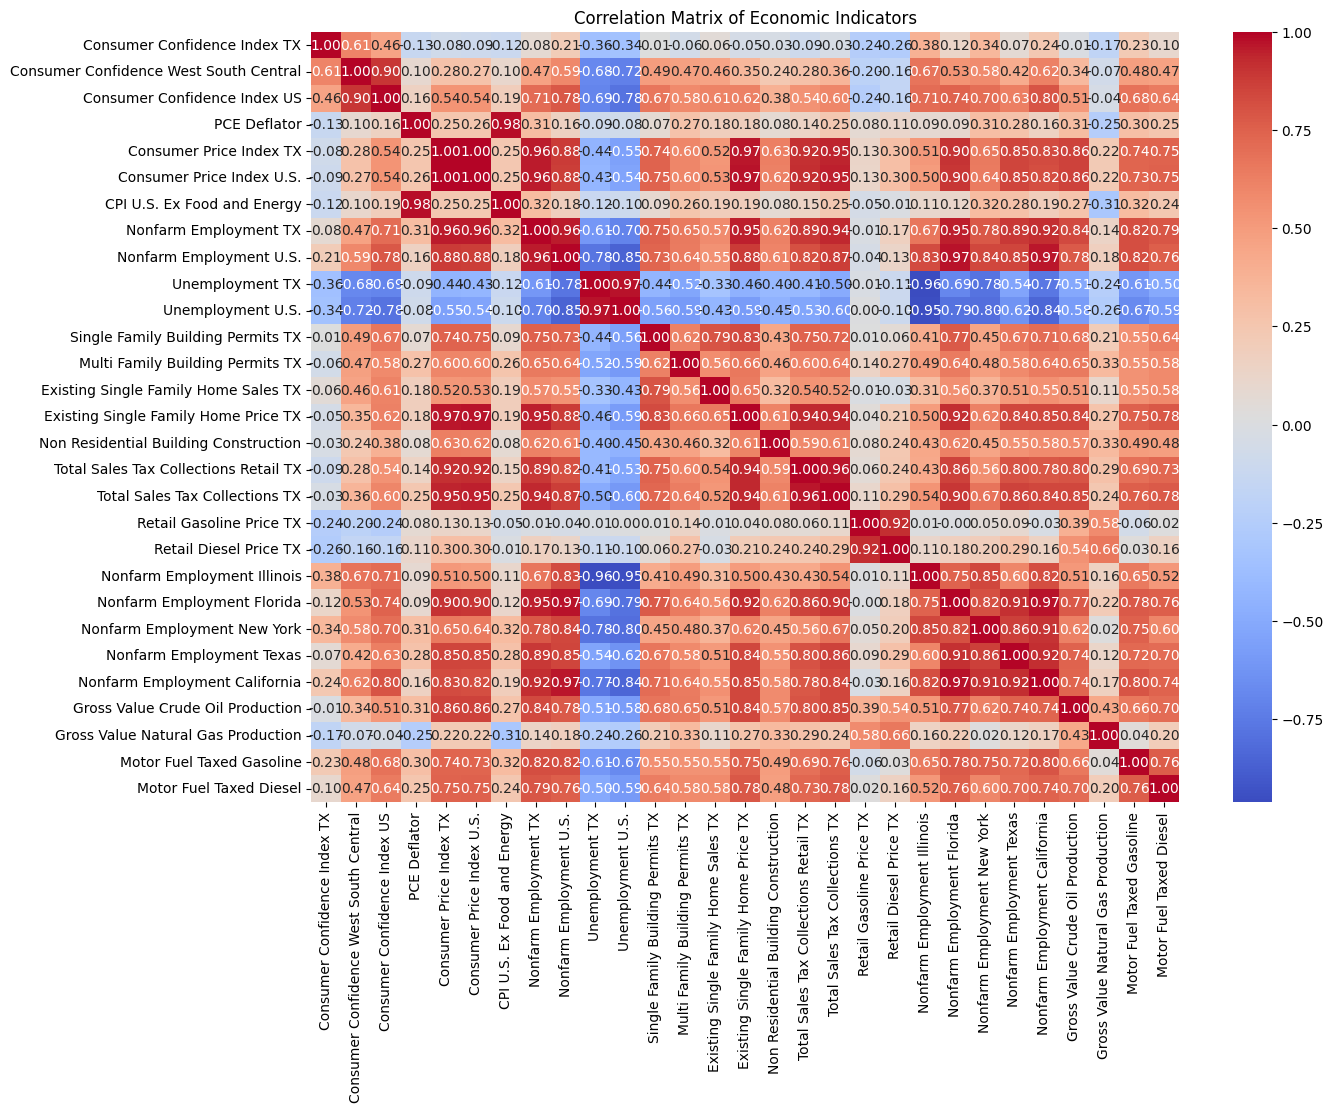

In [6]:
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

In [25]:
df["PCE Deflator NaN"] = df["PCE Deflator"].isna().astype(int)

# Separate features and target variable
X = df.drop("PCE Deflator", axis=1)
y = df["PCE Deflator"]

# Split the data into train and test sets, maintaining the proportion of NaN values
from sklearn.model_selection import train_test_split
# Check for DateTime columns in the feature set
datetime_columns = X.select_dtypes(include=['datetime64']).columns

# If DateTime columns exist, convert them to numerical features (UNIX timestamps)
for col in datetime_columns:
    X[col] = X[col].astype(np.int64) // 10**9  # Convert to seconds since epoch

# Alternatively, drop DateTime columns if they are not necessary
# X = X.drop(columns=datetime_columns)

# Now proceed with the rest of your workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df["PCE Deflator NaN"], random_state=42)
# Remove the NaN indicator from the train and test sets
X_train = X_train.drop("PCE Deflator NaN", axis=1)
X_test = X_test.drop("PCE Deflator NaN", axis=1)


In [26]:
X_train_interpolated = X_train.interpolate()
X_test_interpolated = X_test.interpolate()

# Interpolate missing values in the target variable
y_train_interpolated = y_train.interpolate()
y_test_interpolated = y_test.interpolate()

# Combine the train and test sets into dataframes
train_set = X_train_interpolated.copy()
train_set["PCE Deflator"] = y_train_interpolated

test_set = X_test_interpolated.copy()
test_set["PCE Deflator"] = y_test_interpolated


In [27]:
# Check if there are still NaN values in the features and target variable
print("NaN values in X_train after interpolation:", X_train_interpolated.isna().sum().sum())
print("NaN values in X_test after interpolation:", X_test_interpolated.isna().sum().sum())
print("NaN values in y_train after interpolation:", y_train_interpolated.isna().sum())
print("NaN values in y_test after interpolation:", y_test_interpolated.isna().sum())

NaN values in X_train after interpolation: 0
NaN values in X_test after interpolation: 0
NaN values in y_train after interpolation: 0
NaN values in y_test after interpolation: 0


In [28]:
# Replace missing values with the median in X_train and X_test
X_train_interpolated.fillna(X_train_interpolated.median(), inplace=True)
X_test_interpolated.fillna(X_test_interpolated.median(), inplace=True)

# Replace missing values with the median in y_test
y_test_interpolated.fillna(y_test_interpolated.median(), inplace=True)

In [29]:
# Check again if there are still NaN values
print("NaN values in X_train after imputation:", X_train_interpolated.isna().sum().sum())
print("NaN values in X_test after imputation:", X_test_interpolated.isna().sum().sum())
print("NaN values in y_test after imputation:", y_test_interpolated.isna().sum())

NaN values in X_train after imputation: 0
NaN values in X_test after imputation: 0
NaN values in y_test after imputation: 0


In [31]:
# Standardize data for KNN and SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_interpolated)
X_test_scaled = scaler.transform(X_test_interpolated)

# Define the models and parameter spaces
models = {
    'RandomForest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(n_jobs=-1),
    'SVR': SVR()
}

param_spaces = {
    'RandomForest': {
        'n_estimators': Integer(10, 1000),
        'max_features': Categorical(['sqrt', 'log2']),
        'max_depth': Integer(1, 50),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 20),
        'bootstrap': Categorical([True]),
        'criterion': Categorical(['squared_error', 'absolute_error', 'poisson', 'friedman_mse']),
        'min_impurity_decrease': Real(0.0, 1.0),
        'max_samples': Real(0.1, 1.0)
    },
    'KNN': {
        'n_neighbors': Integer(1, 50),
        'weights': Categorical(['uniform', 'distance']),
        'algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size': Integer(10, 100),
        'p': Integer(1, 3),
        'metric': Categorical(['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
    },
    'SVR': {
        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
        'C': Real(0.1, 1000, prior='log-uniform'),
        'epsilon': Real(0.01, 1.0, prior='log-uniform'),
        'gamma': Real(0.001, 1.0, prior='log-uniform'),
        'degree': Integer(2, 5)
    }
}

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Bayesian optimization and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Perform Bayesian optimization
    opt = BayesSearchCV(
        estimator=model,
        search_spaces=param_spaces[model_name],
        scoring='neg_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        n_iter=50,
        random_state=42
    )
    
    # Fit model
    opt.fit(X_train_scaled if model_name != 'RandomForest' else X_train_interpolated, 
            y_train_interpolated)
    
    # Best hyperparameters and predictions
    best_params = opt.best_params_
    y_pred = opt.predict(X_test_scaled if model_name != 'RandomForest' else X_test_interpolated)
    
    # Calculate and print metrics
    mse = mean_squared_error(y_test_interpolated, y_pred)
    mae = mean_absolute_error(y_test_interpolated, y_pred)
    r2 = r2_score(y_test_interpolated, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("-" * 50)

Training RandomForest...
Best Parameters for RandomForest: OrderedDict({'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 50, 'max_features': 'sqrt', 'max_samples': 0.9762810167661399, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000})
Mean Squared Error (MSE): 0.02406684774515121
Mean Absolute Error (MAE): 0.09334478032356007
R^2 Score: 0.9963671483501382
Root Mean Squared Error (RMSE): 0.15513493399344716
--------------------------------------------------
Training KNN...
Best Parameters for KNN: OrderedDict({'algorithm': 'brute', 'leaf_size': 93, 'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'})
Mean Squared Error (MSE): 0.032567176470588405
Mean Absolute Error (MAE): 0.09494117647059044
R^2 Score: 0.9950840375097999
Root Mean Squared Error (RMSE): 0.18046378160336884
--------------------------------------------------
Training SVR...
Best Parameters for SVR: OrderedDict({'C': 6.016307829589929, 'degree